In [2]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adadelta,Adamax,RMSprop

# extract data from dataset

In [3]:

fldr="./UTkFace"

In [4]:

import os 
flies=os.listdir(fldr)


# create image list from the datset

In [5]:
ages=[]
genders=[]
images=[]

for fle in flies:
     age=int(fle.split('_')[0])
     gender=int(fle.split('_')[1])
     total=fldr+'/'+fle
     print(total)
     image=cv2.imread(total)
        
     image=cv2.cvtColor(image,cv2.COLOR_BGRA2RGB)
     image=cv2.resize(image,(48,48))
     images.append(image)   

./UTkFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTkFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTkFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTkFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTkFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTkFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTkFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTkFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTkFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTkFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTkFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTkFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTkFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTkFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTkFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTkFace/10_0_0_2017

# create list of age and gender from the dataset

In [6]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

## viewing a sample

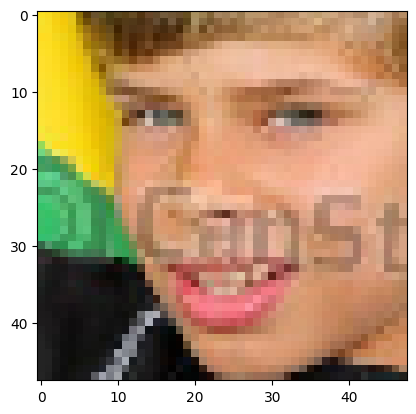

In [7]:
plt.imshow(images[45])

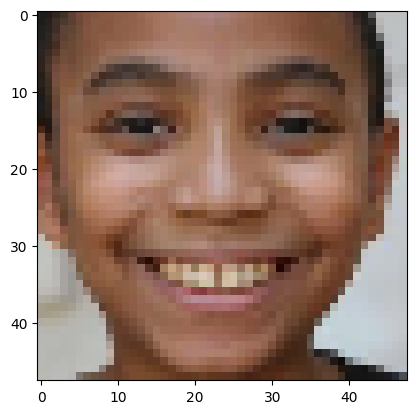

In [8]:
plt.imshow(images[87])

In [9]:
print(ages[87])

10


In [10]:
print(genders[87])

0


# saving images array,ages array and genders array in the system

In [11]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)


In [12]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

# finding the number of male and female samples

In [13]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


# plotting the no. of male and female samples

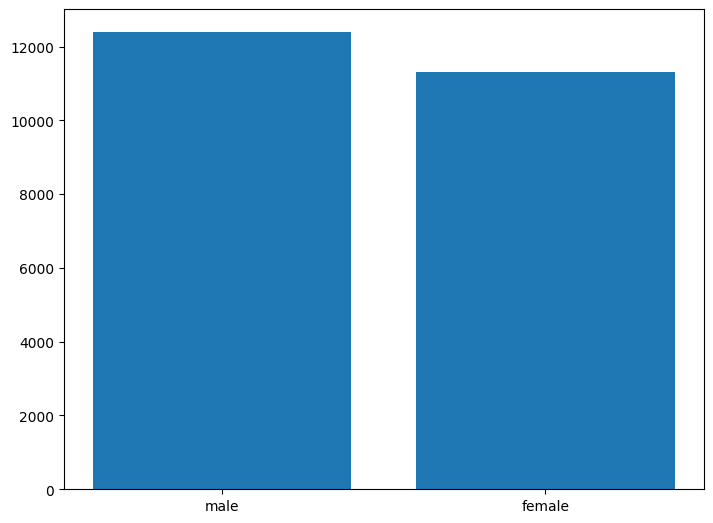

In [14]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['male','female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

# finding the no of samples in each age

In [15]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


# plotting the samples agewise

##converting age counts to lists

In [16]:
val=values.tolist()
cnt=counts.tolist()

# plotting the saple agewise

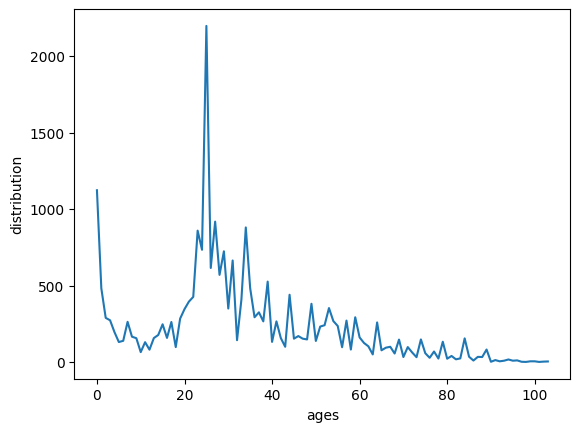

In [17]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

# defining labels for output

In [18]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

# creating another list of images from existing one
# for better learning

In [19]:
images_f_2=images_f/255

In [20]:
images_f_2.shape

(23708, 48, 48, 3)

In [21]:
labels_f=np.array(labels)

# splitting the dataset into test and train

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [24]:
y_train[0:5]

array([[32,  1],
       [36,  1],
       [23,  1],
       [40,  1],
       [30,  0]])

# splitting 'y_test' and 'y_train' further for better understanding
#

In [49]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [51]:
y_train_2[0][0:5]

array([1, 1, 1, 1, 0])

In [52]:
y_train_2[1][0:5]


array([32, 36, 23, 40, 30])

# defining the model

In [53]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding='same',strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [54]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [55]:
Model_created=model((48,48,3))

In [56]:
Model_created.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 48, 48, 32)   896         ['input_2[0][0]']                
                                                                                                  
 dropout_6 (Dropout)            (None, 48, 48, 32)   0           ['conv2d_4[0][0]']               
                                                                                                  
 activation_4 (Activation)      (None, 48, 48, 32)   0           ['dropout_6[0][0]']              
                                                                                            

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint

# initializing the model

In [58]:
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [ ]:
# running the model

In [65]:
History=Model_created.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 15.1424 - sex_out_loss: 0.6491 - age_out_loss: 14.3329 - sex_out_accuracy: 0.6031 - age_out_accuracy: 0.0471
Epoch 1: val_loss improved from inf to 13.07244, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 77s 278ms/step - loss: 15.1424 - sex_out_loss: 0.6491 - age_out_loss: 14.3329 - sex_out_accuracy: 0.6031 - age_out_accuracy: 0.0471 - val_loss: 13.0724 - val_sex_out_loss: 0.5917 - val_age_out_loss: 12.2850 - val_sex_out_accuracy: 0.7193 - val_age_out_accuracy: 0.0481
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 11.8734 - sex_out_loss: 0.5774 - age_out_loss: 11.0757 - sex_out_accuracy: 0.6790 - age_out_accuracy: 0.0458
Epoch 2: val_loss improved from 13.07244 to 11.80079, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 82s 296ms/step - loss: 11.8734 - sex_out_loss: 0.5774 - age_out_loss: 11.0757 - sex_out_accuracy: 0.6790 - a

# model evalution

In [66]:
Model_created.evaluate(x_test,y_test_2)

186/186 [==============================] - 4s 19ms/step - loss: 7.1811 - sex_out_loss: 0.2577 - age_out_loss: 6.3241 - sex_out_accuracy: 0.8876 - age_out_accuracy: 0.0481


[7.181139945983887,
 0.25774163007736206,
 6.324129581451416,
 0.8876328468322754,
 0.048085033893585205]

In [67]:
pred=Model_created.predict(x_test)

186/186 [==============================] - 4s 20ms/step


In [68]:
pred[1]

array([[64.554344 ],
       [19.150723 ],
       [45.581223 ],
       ...,
       [ 1.233644 ],
       [ 9.069335 ],
       [ 1.3613124]], dtype=float32)

# plotting loss

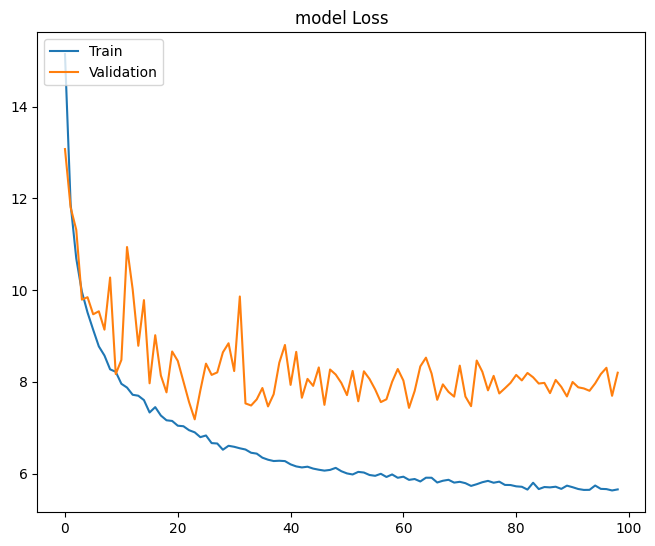

In [96]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(["Train","Validation"],loc="upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# plotting sex accuracy

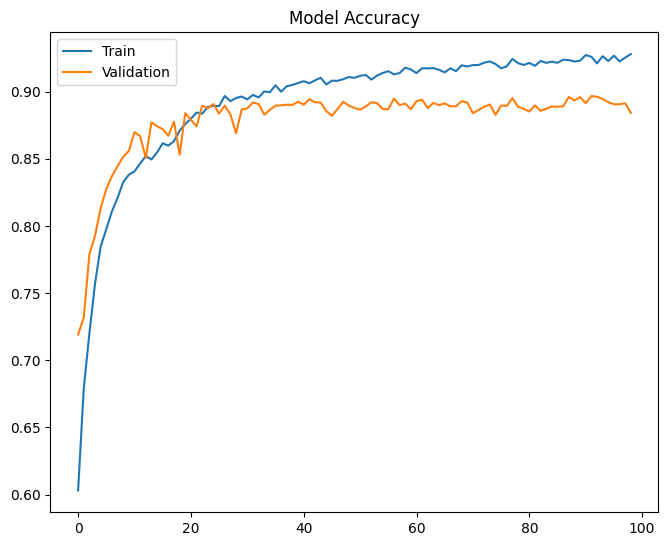

In [70]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.xlabel=('Accuracy')
plt.legend(["Train","Validation"],loc="upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# plotting gender accuracy

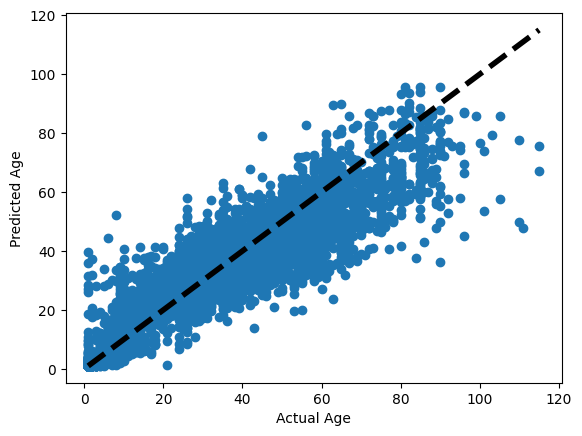

In [97]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

# Making Report Of The Model

In [76]:
i=0
pred_1=[]
while(i<len(pred[0])):
    pred_1.append(int(np.round(pred[0][i])))
    i=i+1        

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [78]:
report=classification_report(y_test_2[0],pred_1)

In [79]:
print(report)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3077
           1       0.91      0.85      0.88      2850

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



# Making heatmap of the Model(gender only)

In [80]:
results=confusion_matrix(y_test_2[0],pred_1)

<AxesSubplot:>

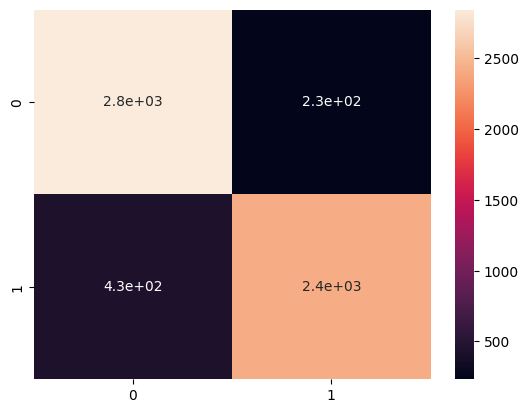

In [81]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [88]:
def test_image(ind,images_f,images_f_2,model):
    plt.imshow(images_f[ind])
    image_test=(images_f_2[ind])
    pred_1=Model_created.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age is " + str(age))
    print("Predicted Gender is " + sex_f[sex])

# Testing the images ourself

# test 1

1/1 [==============================] - 0s 23ms/step
Predicted Age is 92
Predicted Gender is Female


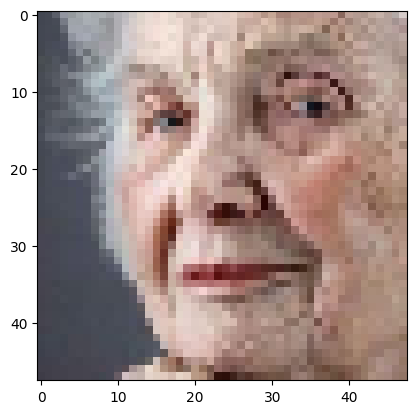

In [89]:
test_image(4,images_f,images_f_2,model)

# test 2

1/1 [==============================] - 0s 27ms/step
Predicted Age is 8
Predicted Gender is Male


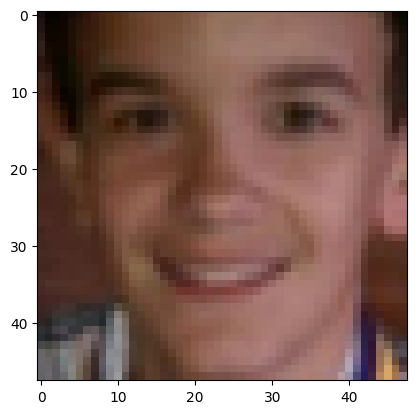

In [90]:
test_image(23,images_f,images_f_2,model)

# test 3

1/1 [==============================] - 0s 23ms/step
Predicted Age is 8
Predicted Gender is Female


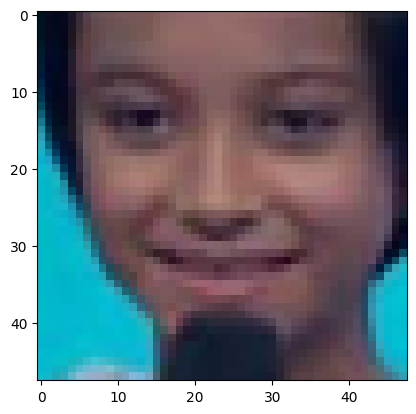

In [92]:
test_image(168,images_f,images_f_2,model)

# test 3

1/1 [==============================] - 0s 25ms/step
Predicted Age is 26
Predicted Gender is Female


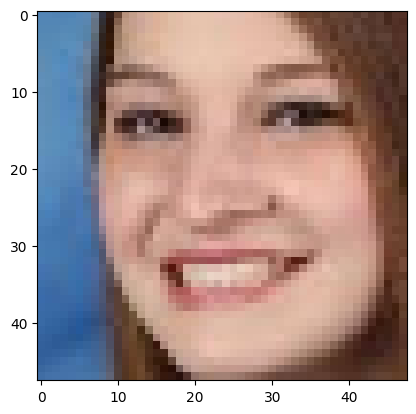

In [94]:
test_image(1288,images_f,images_f_2,model)

# Error in its age in this case

In [1]:
test_image(888,images_f,images_f_2,model)

NameError: name 'test_image' is not defined